# Student Marks Prediction.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/MehadiHassanFysal/Regression-Analysis-Statsmodels/refs/heads/main/Student_Marks%20(Simple%20Linear%20Regression%20using%20Statsmodels).csv')

In [ ]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [3]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

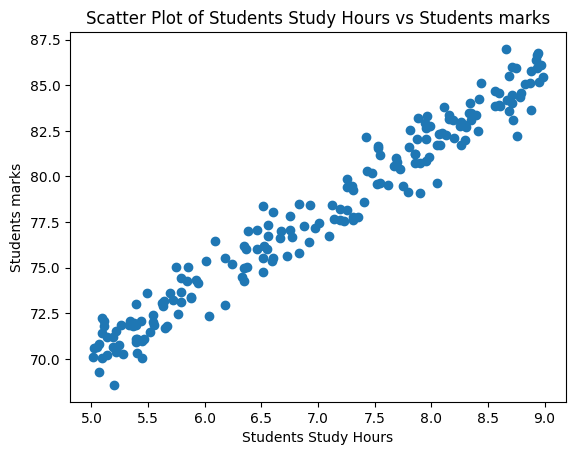

In [6]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms

In [7]:
# Data Cleaning

In [8]:
df.isnull().sum()

,0
study_hours,5
student_marks,0


In [9]:
df.study_hours.mean()

np.float64(6.9959487179487185)

In [10]:
df2 = df.fillna(df.study_hours.mean())

In [11]:
df2.isnull().sum()

,0
study_hours,0
student_marks,0


In [ ]:
# split dataset

In [12]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
est = smf.ols(formula = 'student_marks ~ study_hours', data = df2).fit()

In [14]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          student_marks   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     4499.
Date:                Fri, 23 Jan 2026   Prob (F-statistic):          4.19e-138
Time:                        17:39:49   Log-Likelihood:                -285.54
No. Observations:                 200   AIC:                             575.1
Df Residuals:                     198   BIC:                             581.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      50.6744      0.413    122.793      0.000      49.861      51.488
study_hours     3.8965      0.058     67.074      0.000       3.782       4.011
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.230
Skew:                          -0.065   Prob(JB):                        0.891
Kurtosis:                       2.896   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [17]:
lr.coef_

array([3.89645241])

In [18]:
lr.intercept_

np.float64(50.67436878323756)

In [19]:
lr.score(X,y)

0.957845054589008

In [20]:
y_pred  = lr.predict(X)
y_pred

array([77.28713872, 76.23509657, 77.93375   , 72.76725393, 84.45661115,
       80.09258445, 76.66370633, 85.70347592, 70.89695677, 76.97542253,
       76.35199014, 84.02800138, 80.87187493, 81.45634279, 82.58631399,
       76.19613204, 75.45580609, 83.56042709, 83.44353352, 80.56015874,
       79.58604564, 82.46942042, 70.35145344, 73.46861536, 71.9100344 ,
       81.69012994, 76.04027395, 76.89749348, 73.81929608, 79.81983278,
       82.35252685, 77.93375   , 71.71521178, 84.88522091, 84.65143377,
       78.33918087, 81.3004847 , 78.68986158, 72.57243131, 81.37841375,
       71.24763749, 85.43072425, 71.94899892, 83.01492376, 82.19666875,
       74.75444465, 77.98850015, 70.19559534, 72.26071511, 70.50731153,
       70.50731153, 79.15743587, 84.61246924, 72.18278607, 84.80729186,
       84.53454019, 73.07897012, 85.46968877, 71.67624725, 72.68932488,
       72.06589249, 78.96261325, 75.41684156, 80.75498136, 85.27486615,
       71.9100344 , 81.3004847 , 82.85906566, 70.42938248, 82.82

In [21]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.957845054589008

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [24]:
X_train

,study_hours
137,5.14
163,6.75
111,6.37
123,7.62
109,5.02
...,...
43,8.30
22,5.05
72,6.35
15,6.55


In [25]:
y_train

,student_marks
137,71.22
163,77.07
111,75.04
123,79.53
109,70.58
...,...
43,82.84
22,70.67
72,74.97
15,76.03


In [26]:
X_test

,study_hours
112,6.920000
29,7.480000
182,8.660000
199,8.350000
193,7.550000
85,5.630000
10,6.590000
54,8.760000
115,5.790000
35,7.100000


In [27]:
y_test

,student_marks
112,76.38
29,80.17
182,86.99
199,83.50
193,79.64
85,72.87
10,75.37
54,82.21
115,74.44
35,76.76


# Select a model and train it

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr.coef_

array([3.89080275])

In [30]:
lr.intercept_

np.float64(50.68887428501462)

In [31]:
lr.score(X_test,y_test)

0.9464897639129054

In [32]:
m = 3.89080275
c = 50.688874285014634
z  = m * 40 + c
z

206.32098428501465

In [33]:
lr.predict([[40]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.32098427])

In [34]:
y_pred  = lr.predict(X_test)
y_pred

array([77.61322931, 79.79207885, 84.3832261 , 83.17707724, 80.06443504,
       72.59409376, 76.3292644 , 84.77230637, 73.2166222 , 78.31357381,
       80.84259559, 71.85484124, 81.42621601, 75.82346005, 71.6603011 ,
       77.90873079, 82.16546853, 72.74972587, 81.62075614, 82.5545488 ,
       73.45007037, 81.65966417, 76.64052862, 76.01800018, 71.62139308,
       70.99886464, 74.73403528, 71.89374927, 72.24392152, 77.90873079,
       83.44943344, 85.2392027 , 76.95179284, 85.43374284, 70.49306028,
       70.57087634, 75.51219583, 85.43374284, 71.15449675, 72.16610546])

In [35]:
temp = np.c_[X_test, y_test, y_pred]
temp

array([[ 6.92      , 76.38      , 77.61322931],
       [ 7.48      , 80.17      , 79.79207885],
       [ 8.66      , 86.99      , 84.3832261 ],
       [ 8.35      , 83.5       , 83.17707724],
       [ 7.55      , 79.64      , 80.06443504],
       [ 5.63      , 72.87      , 72.59409376],
       [ 6.59      , 75.37      , 76.3292644 ],
       [ 8.76      , 82.21      , 84.77230637],
       [ 5.79      , 74.44      , 73.2166222 ],
       [ 7.1       , 76.76      , 78.31357381],
       [ 7.75      , 79.5       , 80.84259559],
       [ 5.44      , 72.08      , 71.85484124],
       [ 7.9       , 80.76      , 81.42621601],
       [ 6.46      , 76.02      , 75.82346005],
       [ 5.39      , 73.02      , 71.6603011 ],
       [ 6.99594872, 78.68      , 77.90873079],
       [ 8.09      , 82.38      , 82.16546853],
       [ 5.67      , 71.82      , 72.74972587],
       [ 7.95      , 80.86      , 81.62075614],
       [ 8.19      , 83.08      , 82.5545488 ],
       [ 5.85      , 75.02      , 73.450

In [36]:
result = pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])
result

,study_hours,student_marks_original,student_marks_predicted
0,6.920000,76.38,77.613229
1,7.480000,80.17,79.792079
2,8.660000,86.99,84.383226
3,8.350000,83.50,83.177077
4,7.550000,79.64,80.064435
5,5.630000,72.87,72.594094
6,6.590000,75.37,76.329264
7,8.760000,82.21,84.772306
8,5.790000,74.44,73.216622
9,7.100000,76.76,78.313574


In [37]:
result['Error'] = result['student_marks_original'] - result['student_marks_predicted']
result['SE'] = result['Error'] * result['Error']
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE
0,6.920000,76.38,77.613229,-1.233229,1.520855
1,7.480000,80.17,79.792079,0.377921,0.142824
2,8.660000,86.99,84.383226,2.606774,6.795270
3,8.350000,83.50,83.177077,0.322923,0.104279
4,7.550000,79.64,80.064435,-0.424435,0.180145
5,5.630000,72.87,72.594094,0.275906,0.076124
6,6.590000,75.37,76.329264,-0.959264,0.920188
7,8.760000,82.21,84.772306,-2.562306,6.565414
8,5.790000,74.44,73.216622,1.223378,1.496653
9,7.100000,76.76,78.313574,-1.553574,2.413592


In [38]:
SSR = result['SE'].sum() # SSR-sum of square residuals
SSR

np.float64(54.279347272012174)

In [39]:
MY = result['student_marks_original'].mean()
MY

np.float64(77.436)

In [40]:
result['Y-MY']=result['student_marks_original']-MY
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676


In [41]:
result['Y-MY-SQ']=result['Y-MY']*result['Y-MY']
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY,Y-MY-SQ
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056,1.115136
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734,7.474756
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554,91.278916
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064,36.772096
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204,4.857616
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566,20.848356
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066,4.268356
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774,22.791076
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996,8.976016
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676,0.456976


In [42]:
SST = result['Y-MY-SQ'].sum()
SST

np.float64(1014.3731599999999)

In [43]:
R_squared = 1 - SSR/SST
R_squared

np.float64(0.9464897639129054)

In [44]:
result['AE'] = abs(result['Error'])
result['APE'] = result['AE']/result['student_marks_original']
result

,study_hours,student_marks_original,student_marks_predicted,Error,SE,Y-MY,Y-MY-SQ,AE,APE
0,6.920000,76.38,77.613229,-1.233229,1.520855,-1.056,1.115136,1.233229,0.016146
1,7.480000,80.17,79.792079,0.377921,0.142824,2.734,7.474756,0.377921,0.004714
2,8.660000,86.99,84.383226,2.606774,6.795270,9.554,91.278916,2.606774,0.029966
3,8.350000,83.50,83.177077,0.322923,0.104279,6.064,36.772096,0.322923,0.003867
4,7.550000,79.64,80.064435,-0.424435,0.180145,2.204,4.857616,0.424435,0.005329
5,5.630000,72.87,72.594094,0.275906,0.076124,-4.566,20.848356,0.275906,0.003786
6,6.590000,75.37,76.329264,-0.959264,0.920188,-2.066,4.268356,0.959264,0.012727
7,8.760000,82.21,84.772306,-2.562306,6.565414,4.774,22.791076,2.562306,0.031168
8,5.790000,74.44,73.216622,1.223378,1.496653,-2.996,8.976016,1.223378,0.016434
9,7.100000,76.76,78.313574,-1.553574,2.413592,-0.676,0.456976,1.553574,0.020239


In [45]:
MAPE = result['APE'].mean()
MAPE

np.float64(0.01249115697063177)

In [46]:
Acuracy = 1 - MAPE
Acuracy

np.float64(0.9875088430293683)

## Fine-tune your model

In [47]:
lr.score(X_test,y_test)

0.9464897639129054

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9464897639129054

In [50]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
MAE

0.9689284521096152

In [51]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.01249115697063177

In [52]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(RMSE)

1.3569836818003043
1.1648964253530458


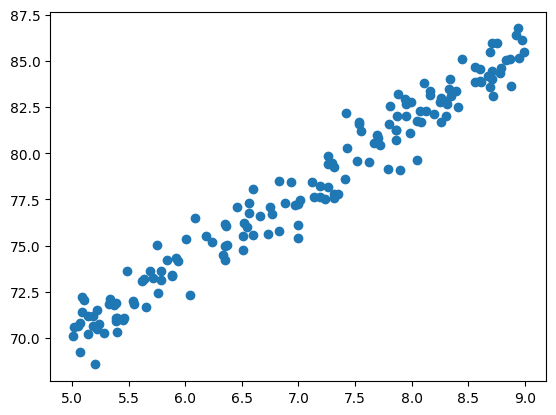

In [53]:
plt.scatter(X_train,y_train)

In [54]:
lr.predict(X_train)

array([70.68760042, 76.95179284, 75.4732878 , 80.33679124, 70.22070409,
       79.59753871, 85.39483481, 72.63300179, 84.14977793, 80.06443504,
       81.2705839 , 74.96748344, 83.99414582, 72.24392152, 71.89374927,
       84.88903045, 81.2705839 , 70.88214056, 79.28627449, 71.6603011 ,
       73.80024262, 73.09989812, 80.60914743, 71.9326573 , 83.17707724,
       76.6016206 , 70.99886464, 71.46576097, 73.41116234, 76.01800018,
       77.80776945, 81.03713573, 81.77638825, 73.56679445, 76.21254032,
       76.36817243, 84.57776623, 85.58937495, 80.64805546, 77.90873079,
       73.72242656, 81.2705839 , 78.66374605, 78.93610225, 75.39547174,
       77.26305706, 76.87397679, 74.73403528, 85.2392027 , 72.82754193,
       79.55863069, 79.98661899, 83.33270935, 81.07604376, 76.21254032,
       82.32110064, 77.65213734, 83.52724949, 72.67190982, 72.28282954,
       78.39138986, 78.46920592, 84.14977793, 70.99886464, 81.42621601,
       77.0296089 , 82.43782472, 84.49995018, 75.43437977, 82.12

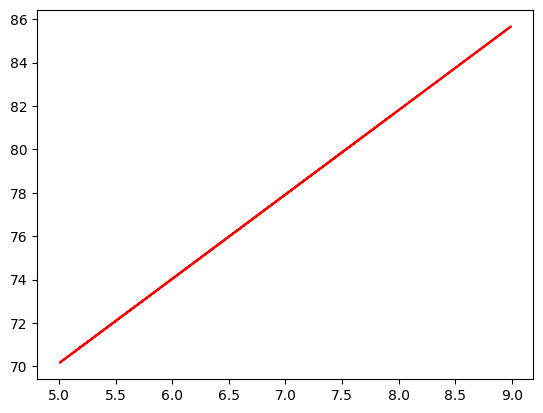

In [55]:
plt.plot(X_train, lr.predict(X_train), 'r-')

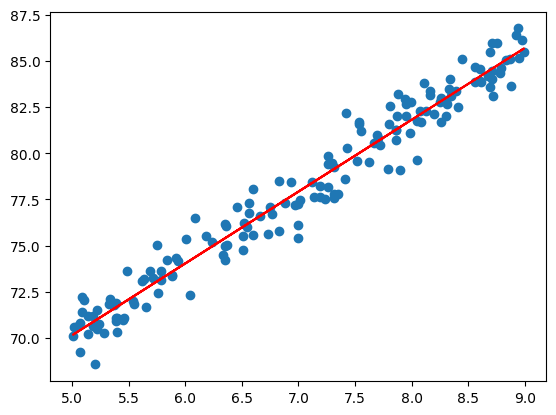

In [56]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

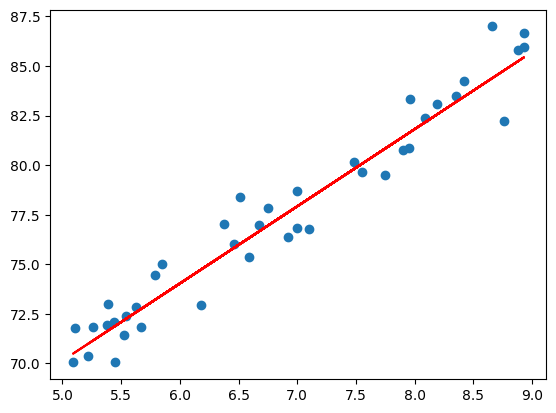

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

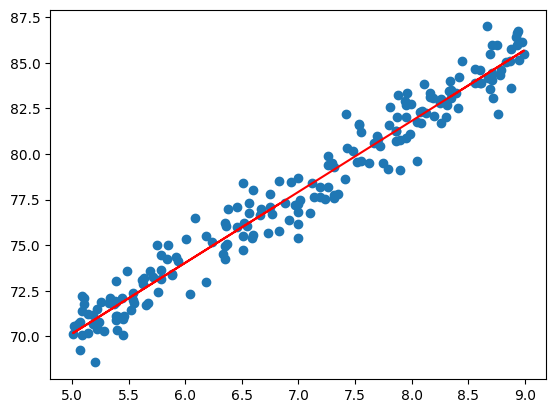

In [58]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")